In [1]:
import matplotlib.pyplot as plt
from IPython.display import Latex
from IPython.html.widgets import interactive
%pylab inline --no-import-all
#If the widger sliders don't work, then you have been affected by the 'Big Split'
#If you have installed Ipython from the Anaconda distribution and your notebook
#does not have Jupyter logo at the top go to a terminal and type conda install jupyter
#If you do have jupyter installed try starting Ipython from a terminal by typing
# jupyter notebook then opening this notebook

Populating the interactive namespace from numpy and matplotlib


/Users/schultzk/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from scipy.integrate import odeint, ode
from scipy import sqrt, linspace, cos, sin

# Introduction

In what follows we will generate some code that allows us to interactively change parameters that control the behavior of light in a material.

## Theory

We will follow the presentation in chapter two of (Peatross and Ware 2013)  http://optics.byu.edu/textbook.aspx in what follows.

When light passes through a medium the electric field of the light field interacts with the electrons in medium. This is clled polarization. We can think of the electrons being bound to the nucleus by little springs. The "spring constant" determines how effectively the electic field of the light wave moves the electrons around. Thus, the different frequencies of light effect the electrons to different degrees. If the light wave is oscillating at a natural frequency of the electron, then the light will get strongly absorbed and will be attenuated as it passes through the medium. If the light is not absorbed there will still be a phase difference between the polarization of the medium and light field that causes a frequency-dependent velocity.


### Math

We take the wave equation in a homogeneous, isotropic, non-conducting material to be

$$\nabla^2\mathbf{E}-\frac{1}{c^2}\frac{\partial^2 \mathbf{E}}{\partial t^2}=\mu_0\frac{\partial^2\mathbf{P}}{\partial t^2}$$

If we assume that the material and intensity of the light is such that everything behaves linearly, we can take our solutions to be plane waves of the form:


$$
\begin{align}
\mathbf{E}&=\mathbf{E_0}e^{i\mathbf{k}\cdot\mathbf{r}-\omega t}\\
\mathbf{P}&=\mathbf{P_0}e^{i\mathbf{k}\cdot\mathbf{r}-\omega t}
\end{align}
$$

Before proceeding we need the so-called consitutive relation between $\mathbf{E}\textrm{ and }\mathbf{P}$:

$$\mathbf{P}_0=\epsilon_0\chi(\omega)\mathbf{E}_0(\omega)$$

$\chi(\omega)$ is a proportionality constant called the susceptibility and is medium dependent.

Pluggin these solutions potential solutions into the wave equation we arrive at the dispersion relationship.

$$k=\frac{\omega}{c}\sqrt{1+\chi(\omega)}$$

At this point we recognize that $\chi(\omega)$ may be complex, we define a complex index of refraction:

$$\mathcal{N}(\omega)=n(\omega)+i\kappa(\omega)=\sqrt{1+\chi(\omega)}$$

and $k=\frac{\mathcal{N}\omega}{c}=\frac{(n+i\kappa)\omega}{c}$. Plugging this complex $k$ into our solutions for $\mathbf{E}$ and $\mathbf{P}$ we identify $n$ with the usual definition of phase velocity and $\kappa$ with an attenuation factor.

We need to do one more thing before we do our calculations and that is to derive an expression for $\chi(\omega)$. 

Remember when we said that we can pretend electrons are attached to atoms by springs? Well now we are going to take advantage of this. What we are really doing is approximating the force that the electron sits in by a Taylor expansion and only keeping the first order term, which looks like a restoring force, and so we pretend that we have a spring. This breaks down, if the driving light field moves the electron very far away from its equilibrium point and higher order terms of the expansion are needed to agree with experiment. This is a really amazing regime to be in and one we are ignoring for now.

So modeling our electron as a damped, driven harmonic oscillator we get the following differential equation.

$$m_e\ddot{\mathbf{r}}=q_e\mathbf{E}-m_e\gamma\dot{\mathbf{r}}-k_{\textrm{hooke}}\mathbf{r}$$

rearranging...

$$\ddot{\mathbf{r}}+\gamma\dot{\mathbf{r}}+\omega_0^2\mathbf{r}=\frac{q_E}{m_e}\mathbf{E}e^{i\omega t},$$

where $\omega_0=\sqrt{k_{\textrm{hooke}}/m_e}$ is the resonant frequency of the system, and we dropped the $k\cdot r$ term of the oscillating field, since an atom is so much smaller than optical light.

The inhomogeneous solution is given by 

$$\mathbf{r}=\left(\frac{q_e}{m_e} \right)\frac{\mathbf{E}_0 e^{i\omega t}}{\omega_0^2-i\omega\gamma-\omega^2}$$

### Solving the SHO equation

First rewrite the second-order ODE as two first-order ODE

In [4]:
def dy(y,t,gamma,omega_o,omega,amp):
    x,p=y[0],y[1]
    dx=p
    dp=-gamma*omega_o*p-omega_o**2*x+amp*cos(omega*t)
    return[dx,dp]

Now define the intial conditions and create an array of time values

In [5]:
y0=[1.0,0.0]
t=linspace(0.,20,1000)

Call scipy's ODE solver

In [6]:
def solve_ODE(omega_o,gamma, omega, amp):
    y=odeint(dy,y0,t,args=(gamma,omega_o,omega,amp))
    field=[]
    field=amp*cos(omega*t)
    rcdef = plt.rcParams.copy()
    newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (8, 4),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}
    # Update the global rcParams dictionary with the new parameter choices
# Before doing this, we reset rcParams to its default again, just in case
    plt.rcParams.update(rcdef)
    plt.rcParams.update(newparams)
   
    
    fig,ax1 =plt.subplots()
    ax1.plot(t,y[:,0],'b-',label='r')
    ax1.set_xlabel('time (s)')

    for tl in ax1.get_yticklabels():
        tl.set_color('b')
    ax2=ax1.twinx()
    ax1.set_ylabel('displacement')
    ax2.set_ylabel('field')
    ax2.plot(t,field,'r-',label='driving field')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
       
    plt.rcParams.update(rcdef)

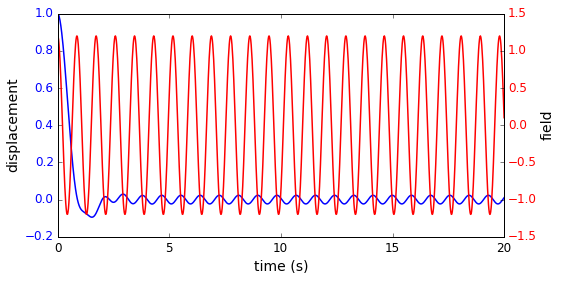

In [7]:
w=interactive(solve_ODE,omega_o=(1.,10.),gamma=(0.,10.),omega=(0.,20.),amp=(0.,10.))
display(w)

### Getting to the complex index

We now define the total polarization of the medium as 

$\mathbf{P}=N q_e r$, where $N$ is the electron density. Plugging in our solution to $\mathbf{r}$ into our equation for the net polarization

$\mathbf{P}=\epsilon_0\left(\frac{\omega_p^2}{\omega_0^2-i\omega\gamma-\omega^2} \right)\mathbf{E_0}e^{iwt},$ where $\omega_p=\sqrt{\frac{Nq_e^2}{\epsilon_0 m_e}}$ is calle the plasma frequency. The plasma frequency is an important parameter for metals.

The complex part of $\mathbf{P}$ tells us that there is a phase relationship between the driving field and the polarization. When the driving field is on resonance the two are in phase and the oscillating electrons contribute a light field that constructively intereferes with the driving field. If there was no damping term, the resulting light field would grow without limit.

Comparing our result for the polarization with our definition of the susceptability we see that

$\chi(\omega)=\frac{\omega_p^2}{\omega_0^2-i\omega\gamma-\omega^2}$

Putting all of it together we have $(n+i\kappa)^2=1+\chi(\omega)=1+\frac{\omega_p^2}{\omega_0^2-i\omega\gamma-\omega^2}$. 

The cell below defines the complex index of refraction and plots $n$ and $\kappa$ as a function o frequency for arbitrary parameters.

In [8]:
def complex_index(omega_o=10., gamma=1., omega_p=1):
    #create the "x-axis"
    omega=linspace(0,30,1000) 
    
    #Equation 
    nk=sqrt(1+(pow(omega_p,2))/(pow(omega_o,2)-omega*gamma*1.j-pow(omega,2)))
    n=nk.real
    kappa=nk.imag
    
    rcdef = plt.rcParams.copy()
    newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (16, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}

    # Update the global rcParams dictionary with the new parameter choices
    # Before doing this, we reset rcParams to its default again, just in case
    plt.rcParams.update(rcdef)
    plt.rcParams.update(newparams)

    # Make the new figure with new formatting
    fig, axes = plt.subplots(1, 2)

    axes[0].plot(omega, n, label ='index of refraction, n')
    axes[1].plot(omega, kappa, label='attenuation, \kappa')

    axes[0].legend()
    axes[1].legend()
    
    axes[0].set_xlabel(r'$\omega (\mathrm{s})^{-1}$')

    axes[1].set_xlabel(r'$\omega (\mathrm{s})^{-1}$')

    plt.rcParams.update(rcdef)

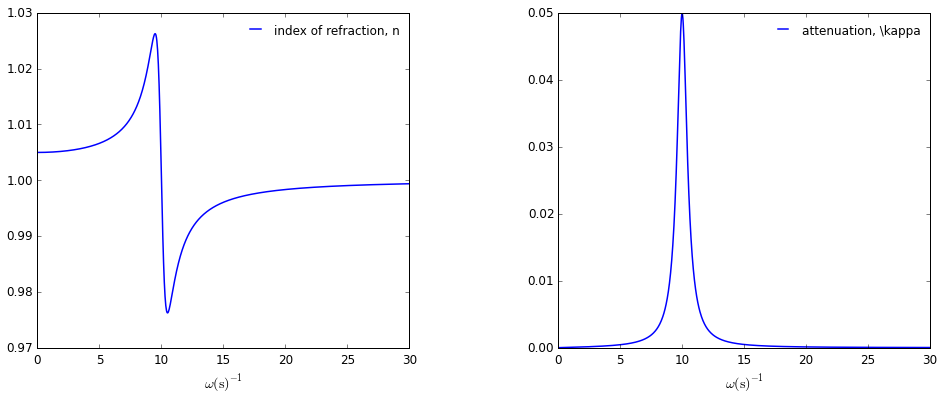

In [9]:
w=interactive(complex_index,omega_o=(1.,50.), gamma=(0,5.), omega_p=(1.,10.))
display(w)

Last Updated 2/27/2015 @16:52 by K. D. Schultz
